In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

In [51]:
I = np.identity(2)

In [52]:
def KG(s):
    Ggain = np.matrix([[-87.8, 1.4],
                       [-108.2, -1.4]])
    Kgain = np.matrix([[-0.0015, 0],
                       [0, -0.075]])
    return 1/s*Kgain*Ggain

def w_I(s):
    return (s + 0.2) / (0.5 * s + 1)

In [53]:
def T_I(s):
    return KG(s) * (I + KG(s)).I

def M(s):
    return w_I(s) * T_I(s)

In [54]:
def maxsigma(G):
    return np.linalg.svd(G)[1].max()

def specrad(G):
    return np.abs(np.linalg.eigvals(G)).max()

In [58]:
def mu_ubound(G):
    def scaled_system(d0):
        dn = 1  # we set dn = 1 as in note 10 of 8.8.3
        D = np.asmatrix(np.diag([d0[0], dn]))
        return maxsigma(D*G*D.I)
    r = scipy.optimize.minimize(scaled_system, 1)
    return r['fun']

In [59]:
omega = np.logspace(-3, 2, 1000)
s = 1j * omega

T_Is = [T_I(si) for si in s]

In [60]:
mu_ubound(T_Is[3])

1.0043942556993373

In [61]:
def F_of_T_I(func):
    return [func(T) for T in T_Is]

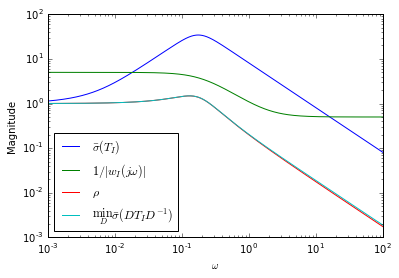

In [62]:
plt.loglog(omega, F_of_T_I(maxsigma), 
           label=r'$\bar\sigma(T_I)$')
plt.loglog(omega, 1 / np.abs(w_I(s)), 
           label=r'$1/|w_I(j\omega)|$')
plt.loglog(omega, F_of_T_I(specrad), 
           label=r'$\rho$')
plt.loglog(omega, F_of_T_I(mu_ubound), 
           label=r'$\min_{D}\bar\sigma(DT_ID^{-1})$')
plt.legend(loc='best')
plt.xlabel(r'$\omega$')
plt.ylabel('Magnitude')

plt.show()